## ViT finetuning on Geo-DE hard image dataset (9739 images)

In [16]:
import pandas as pd
import os
import shutil
from tqdm import tqdm

### Construct train and test set from Geo-DE hard dataset

In [3]:
### load geode dataset
# convert paths in filename_list_train/test.txt to paths in geode_country

df = pd.read_csv('/local2/data/xuanming/geode/index.csv', index_col=False)
class_list = list(df['object'].unique())  # class list in Geo-DE
root_path = '/local/data/xuanming/datasets_difficult_images/'
src_root_path = '/local2/data/xuanming/geode_country/'  # root path of Geo-DE

# create a folder for each class in train and test
for split in ['train', 'test']:
    for class_ in class_list:
        if not os.path.exists(os.path.join(root_path, split, class_)):
            os.makedirs(os.path.join(root_path, split, class_))

In [4]:
# construct object2dirname mapping from old geode dataset
object2dirname = {}
# iterate directories over '/local2/data/xuanming/geode/images/' to get object2index
for dirname in os.listdir('/local2/data/xuanming/geode/images/'):
    idx = dirname.split('.')[0]
    obj = dirname.split('.')[1]
    object2dirname[obj] = dirname
    # object2index[os.path.basename(dir)] = len(object2index)

In [5]:
with open('./filename_list_train.txt', 'r') as f:
    lines = f.readlines()
    for line in tqdm(lines):
        filename = line.strip()
        region = filename.split('/')[0].lower()
        country = filename.split('/')[1]
        img_fname = filename.split('/')[2]
        if len(img_fname.split(country)[1].split('_')) == 3:
            class_ = img_fname.split(country)[1].split('_')[1]
        else:
            class_ = '_'.join(img_fname.split(country)[1].split('_')[1:3])
        # print(class_)
        src_img_path = os.path.join(src_root_path, f'geode_{region.lower()}_{country.lower()}', 'images', object2dirname[class_], img_fname)
        # print(src_img_path)
        dst_img_path = os.path.join(root_path, 'train', class_, img_fname)
        shutil.copy(src_img_path, dst_img_path)
        # os.system('cp /local2/data/xuanming/geode/' + filename + ' ' + new_filename)

100%|██████████| 973/973 [00:01<00:00, 943.33it/s]


In [6]:
with open('./filename_list_test.txt', 'r') as f:
    lines = f.readlines()
    for line in tqdm(lines):
        filename = line.strip()
        region = filename.split('/')[0].lower()
        country = filename.split('/')[1]
        img_fname = filename.split('/')[2]
        if len(img_fname.split(country)[1].split('_')) == 3:
            class_ = img_fname.split(country)[1].split('_')[1]
        elif len(img_fname.split(country)[1].split('_')) == 4:
            class_ = '_'.join(img_fname.split(country)[1].split('_')[1:3])
        else:
            class_ = '_'.join(img_fname.split(country)[1].split('_')[1:4])
        # print(class_)
        src_img_path = os.path.join(src_root_path, f'geode_{region.lower()}_{country.lower()}', 'images', object2dirname[class_], img_fname)
        # print(src_img_path)
        dst_img_path = os.path.join(root_path, 'test', class_, img_fname)
        shutil.copy(src_img_path, dst_img_path)
        # os.system('cp /local2/data/xuanming/geode/' + filename + ' ' + new_filename)

  0%|          | 0/8766 [00:00<?, ?it/s]

100%|██████████| 8766/8766 [00:09<00:00, 948.40it/s] 


In [33]:
s = "Europe/Romania/Romania_plate_of_food_32358.jpg"
c = s.split('/')[1]
fname = s.split('/')[2]
print(c)
print(fname)
if len(fname.split(c)[1].split('_')) == 3:
    class_ = fname.split(c)[1].split('_')[1]
elif len(fname.split(c)[1].split('_')) == 4:
    class_ = '_'.join(fname.split(c)[1].split('_')[1:3])
else:
    class_ = '_'.join(fname.split(c)[1].split('_')[1:4])
# print(fname.split(c)[1].split('_'))
print(class_)
# 

Romania
Romania_plate_of_food_32358.jpg
plate_of_food


### Loading the data

In [17]:
from datasets import load_dataset

dataset_root_path = '/local/data/xuanming/'

# load cifar10 (only small portion for demonstration purposes) 
dataset = load_dataset(dataset_root_path, data_dir='datasets_difficult_images')
train_ds, test_ds = dataset['train'], dataset['test']
# split up training into training + validation
splits = train_ds.train_test_split(test_size=0.1)
train_ds = splits['train']
val_ds = splits['test']

In [4]:
train_ds

Dataset({
    features: ['image', 'label'],
    num_rows: 875
})

In [4]:
train_ds.features

{'image': Image(decode=True, id=None),
 'label': ClassLabel(names=['backyard', 'bag', 'bicycle', 'boat', 'bus', 'candle', 'car', 'chair', 'cleaning_equipment', 'dustbin', 'fence', 'flag', 'front_door', 'hairbrush_comb', 'hand_soap', 'hat', 'house', 'jug', 'light_fixture', 'lighter', 'medicine', 'monument', 'plate_of_food', 'religious_building', 'road_sign', 'spices', 'stall', 'storefront', 'stove', 'streetlight_lantern', 'toothbrush', 'toothpaste_toothpowder', 'toy', 'tree', 'truck', 'waste_container', 'wheelbarrow'], id=None)}

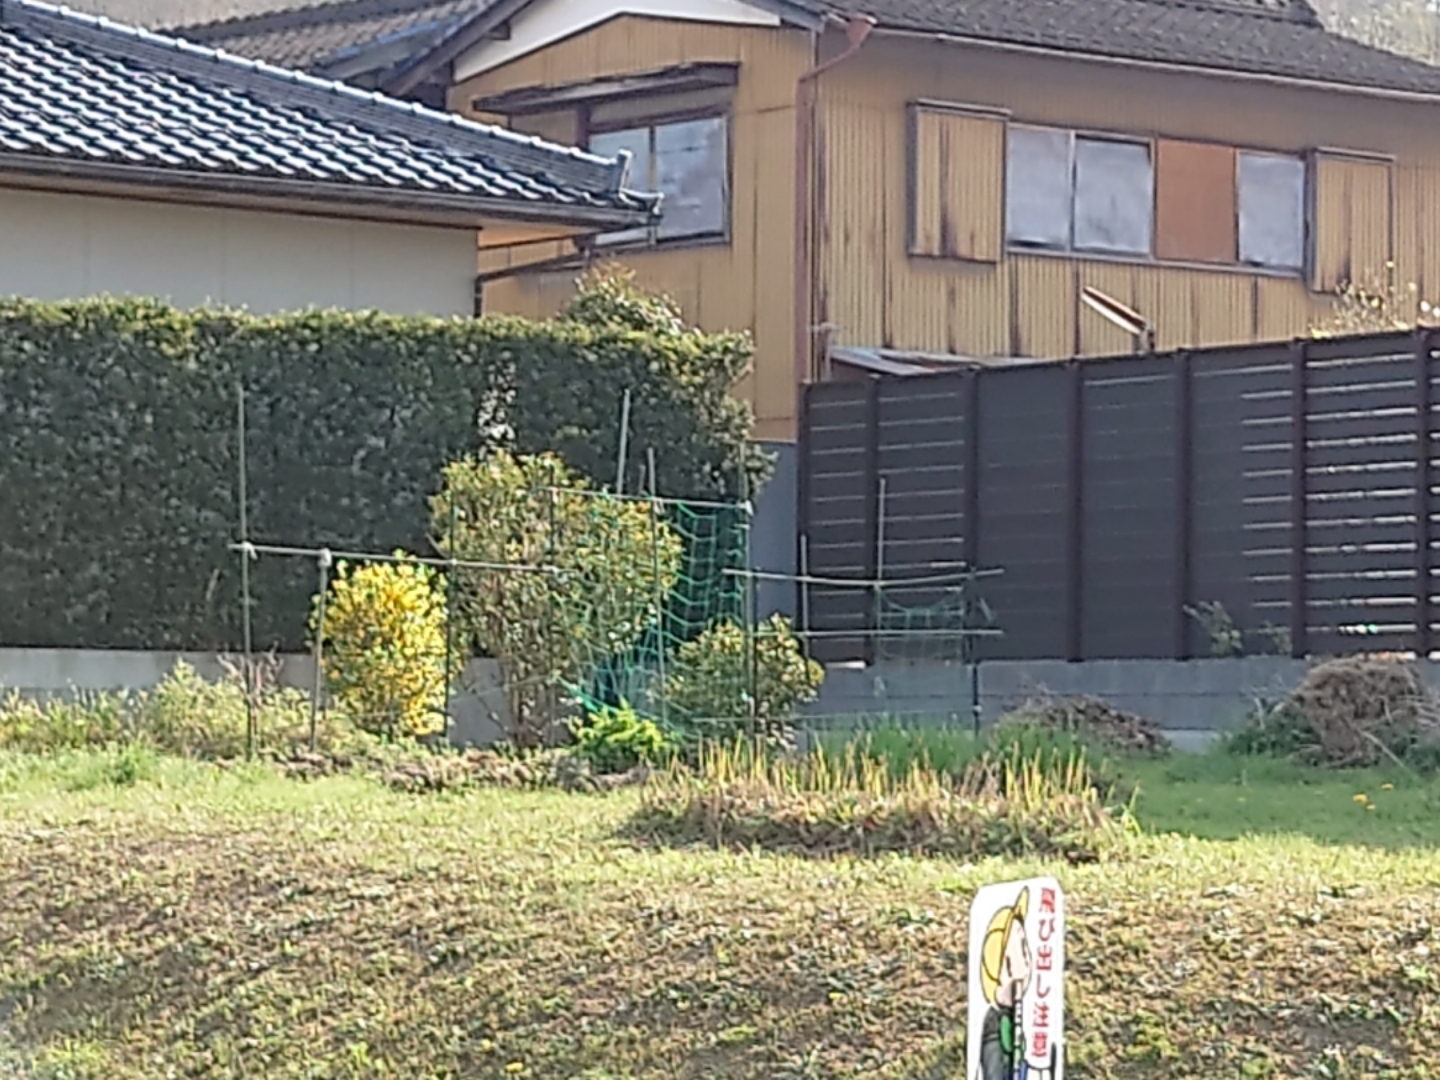

In [34]:
train_ds[20]['image']

In [35]:
train_ds[20]['label']

0

In [18]:
id2label = {id:label for id, label in enumerate(train_ds.features['label'].names)}
label2id = {label:id for id,label in id2label.items()}
id2label

{0: 'backyard',
 1: 'bag',
 2: 'bicycle',
 3: 'boat',
 4: 'bus',
 5: 'candle',
 6: 'car',
 7: 'chair',
 8: 'cleaning_equipment',
 9: 'dustbin',
 10: 'fence',
 11: 'flag',
 12: 'front_door',
 13: 'hairbrush_comb',
 14: 'hand_soap',
 15: 'hat',
 16: 'house',
 17: 'jug',
 18: 'light_fixture',
 19: 'lighter',
 20: 'medicine',
 21: 'monument',
 22: 'plate_of_food',
 23: 'religious_building',
 24: 'road_sign',
 25: 'spices',
 26: 'stall',
 27: 'storefront',
 28: 'stove',
 29: 'streetlight_lantern',
 30: 'toothbrush',
 31: 'toothpaste_toothpowder',
 32: 'toy',
 33: 'tree',
 34: 'truck',
 35: 'waste_container',
 36: 'wheelbarrow'}

In [36]:
id2label[train_ds[20]['label']]

'backyard'

### Preprocessing the data

In [19]:
from transformers import ViTImageProcessor

processor = ViTImageProcessor.from_pretrained("google/vit-base-patch32-224-in21k")

In [20]:
from torchvision.transforms import (CenterCrop, 
                                    Compose, 
                                    Normalize, 
                                    RandomHorizontalFlip,
                                    RandomResizedCrop, 
                                    Resize, 
                                    ToTensor)

image_mean, image_std = processor.image_mean, processor.image_std
size = processor.size["height"]

normalize = Normalize(mean=image_mean, std=image_std)
_train_transforms = Compose(
        [
            RandomResizedCrop(size),
            RandomHorizontalFlip(),
            ToTensor(),
            normalize,
        ]
    )

_val_transforms = Compose(
        [
            Resize(size),
            CenterCrop(size),
            ToTensor(),
            normalize,
        ]
    )

def train_transforms(examples):
    examples['pixel_values'] = [_train_transforms(image.convert("RGB")) for image in examples['image']]
    return examples

def val_transforms(examples):
    examples['pixel_values'] = [_val_transforms(image.convert("RGB")) for image in examples['image']]
    return examples


In [21]:
# Set the transforms
train_ds.set_transform(train_transforms)
val_ds.set_transform(val_transforms)
test_ds.set_transform(val_transforms)

In [9]:
train_ds[:2]

{'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1794x1080>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1080x1440>],
 'label': [35, 35],
 'pixel_values': [tensor([[[ 0.1294,  0.2314,  0.4510,  ..., -0.7882, -0.7961, -0.7725],
           [ 0.1059,  0.2157,  0.5373,  ..., -0.7882, -0.7647, -0.7412],
           [-0.0588,  0.0745,  0.5373,  ..., -0.7647, -0.7647, -0.7255],
           ...,
           [ 0.7020,  0.7020,  0.6706,  ...,  0.2784,  0.3569,  0.3961],
           [ 0.6784,  0.6235,  0.6157,  ...,  0.4118,  0.3882,  0.4196],
           [ 0.6235,  0.6078,  0.7098,  ...,  0.2706,  0.3961,  0.4039]],
  
          [[ 0.1216,  0.2000,  0.3804,  ..., -0.8588, -0.8980, -0.8745],
           [ 0.0980,  0.1922,  0.4588,  ..., -0.8745, -0.8588, -0.8431],
           [-0.0667,  0.0510,  0.4667,  ..., -0.8588, -0.8745, -0.8431],
           ...,
           [ 0.5059,  0.5059,  0.4745,  ...,  0.1451,  0.2314,  0.2706],
           [ 0.4588,  0.4039,  0.4118,  ...,  0.29

In [22]:
from torch.utils.data import DataLoader
import torch

torch.set_num_threads(128)

def collate_fn(examples):
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    labels = torch.tensor([example["label"] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}

train_dataloader = DataLoader(train_ds, collate_fn=collate_fn, batch_size=4)

### Define the model

In [10]:
from transformers import ViTForImageClassification

model = ViTForImageClassification.from_pretrained('google/vit-base-patch32-224-in21k',
                                                  id2label=id2label,
                                                  label2id=label2id,
                                                  ignore_mismatched_sizes=True)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch32-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [11]:
!wandb login

wandb: Currently logged in as: billyzhang24kobe (billy-zhang-07). Use `wandb login --relogin` to force relogin


In [12]:
from transformers import TrainingArguments, Trainer

metric_name = "accuracy"

args = TrainingArguments(
    output_dir='/local/data/xuanming/vit_base_32_in21k',
    save_strategy="epoch",
    evaluation_strategy="epoch",
    learning_rate=2e-4,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    logging_dir='./training_logs',
    remove_unused_columns=False,
    logging_strategy="steps",
    logging_steps=50,
    report_to="wandb",
    run_name="vit-base-patch32-in21k-geodehard-5epochs-2e-4lr-8bsz",
)

In [13]:
from sklearn.metrics import accuracy_score
import numpy as np

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return dict(accuracy=accuracy_score(predictions, labels))

In [14]:
import torch

trainer = Trainer(
    model,
    args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    tokenizer=processor
)

/home/billyzhang/miniconda3/envs/classify_by_description/lib/python3.11/site-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [15]:
from accelerate import Accelerator
accelerator = Accelerator()

trainer = accelerator.prepare(trainer)

In [16]:
trainer.train()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


wandb: Currently logged in as: billyzhang24kobe (billy-zhang-07). Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy
1,1.818500,1.833226,0.540816
2,1.282000,1.455588,0.591837
3,0.996900,1.256884,0.622449
4,0.766600,1.209109,0.683673
5,0.608300,1.098390,0.724490


TrainOutput(global_step=550, training_loss=1.1831597172130237, metrics={'train_runtime': 443.7422, 'train_samples_per_second': 9.859, 'train_steps_per_second': 1.239, 'total_flos': 3.456795335616e+17, 'train_loss': 1.1831597172130237, 'epoch': 5.0})

In [17]:
best_acc = trainer.evaluate()['eval_accuracy']

In [19]:
# save the best model based on eval accuracy
model_path = f'/local/data/xuanming/vit_base_32_in21k/vit_{best_acc:.2f}'
if not os.path.exists(model_path):
    os.makedirs(model_path)
trainer.save_state()
trainer.save_model(model_path)

### Evaluation

In [35]:
from transformers import ViTForImageClassification

model_path = "/local/data/xuanming/vit_base_32_in21k/best_model_0.7653061224489796"

# load the best model from path
model = ViTForImageClassification.from_pretrained(model_path,
                                                  id2label=id2label,
                                                  label2id=label2id,
                                                  ignore_mismatched_sizes=True)
trainer = Trainer(
    model,
    args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    tokenizer=processor,
)

/home/billyzhang/miniconda3/envs/classify_by_description/lib/python3.11/site-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [25]:
outputs = trainer.predict(test_ds)

In [26]:
print(outputs.metrics)

{'test_loss': 0.9037196636199951, 'test_accuracy': 0.7951174994296144, 'test_runtime': 879.9613, 'test_samples_per_second': 9.962, 'test_steps_per_second': 2.491}


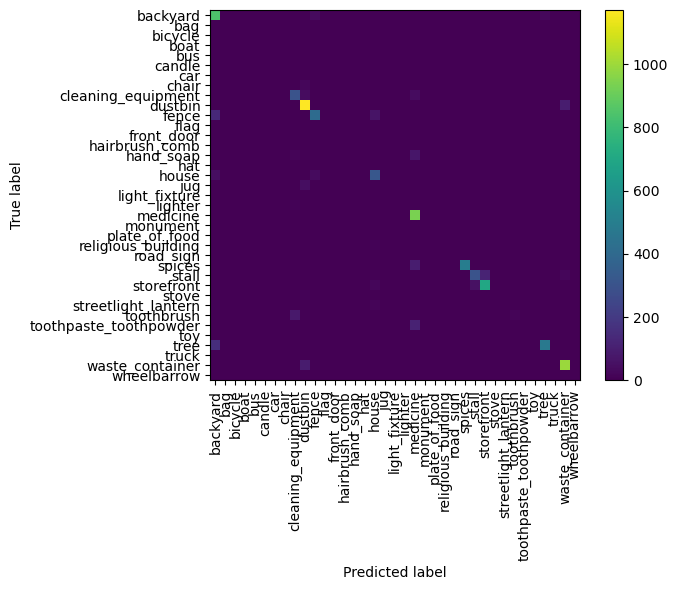

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = outputs.label_ids
y_pred = outputs.predictions.argmax(1)

labels = test_ds.features['label'].names
cm = confusion_matrix(y_true, y_pred, labels=range(len(labels)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(include_values=False, xticks_rotation='vertical')

### CLIP ViT finetuning

In [1]:
from transformers import CLIPImageProcessor, CLIPForImageClassification
import torch
from datasets import load_dataset, load_from_disk

/home/billyzhang/miniconda3/envs/classify_by_description/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
processor = CLIPImageProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [4]:
# Load and preprocess dataset

from torchvision.transforms import (CenterCrop, 
                                    Compose, 
                                    Normalize, 
                                    RandomHorizontalFlip,
                                    RandomResizedCrop, 
                                    Resize, 
                                    ToTensor)

image_mean, image_std = [0.48145466, 0.4578275, 0.40821073], [0.26862954, 0.26130258, 0.27577711]
size = 224

normalize = Normalize(mean=image_mean, std=image_std)
_train_transforms = Compose(
        [
            RandomResizedCrop(size),
            RandomHorizontalFlip(),
            ToTensor(),
            normalize,
        ]
    )

_val_transforms = Compose(
        [
            Resize(size),
            CenterCrop(size),
            ToTensor(),
            normalize,
        ]
    )

def train_transforms(examples):
    examples['pixel_values'] = [_train_transforms(image.convert("RGB")) for image in examples['image']]
    return examples

def val_transforms(examples):
    examples['pixel_values'] = [_val_transforms(image.convert("RGB")) for image in examples['image']]
    return examples


In [6]:
dataset_root_path = '/local/data/xuanming/'

# load cifar10 (only small portion for demonstration purposes) 
dataset = load_dataset(dataset_root_path, data_dir='datasets_difficult_images')
train_ds, test_ds = dataset['train'], dataset['test']
# split up training into training + validation
splits = train_ds.train_test_split(test_size=0.1)
train_ds = splits['train']
val_ds = splits['test']

In [22]:
train_ds

Dataset({
    features: ['image', 'label'],
    num_rows: 875
})

In [7]:
# Set the transforms
train_ds.set_transform(train_transforms)
val_ds.set_transform(val_transforms)
test_ds.set_transform(val_transforms)

In [5]:
# train_ds = train_ds.map(transform, batched=True)
# val_ds = val_ds.map(transform, batched=True)
# test_ds = test_ds.map(transform, batched=True)

Map: 100%|██████████| 8766/8766 [08:01<00:00, 18.19 examples/s]


In [6]:
# # Save the transformed dataset
# train_ds.save_to_disk('/local/data/xuanming/datasets_difficult_images_transformed/train')
# val_ds.save_to_disk('/local/data/xuanming/datasets_difficult_images_transformed/val')
# test_ds.save_to_disk('/local/data/xuanming/datasets_difficult_images_transformed/test')

Saving the dataset (38/38 shards): 100%|██████████| 8766/8766 [06:18<00:00, 23.18 examples/s]


In [8]:
# # load the transformed dataset
# train_ds = load_from_disk('/local/data/xuanming/datasets_difficult_images_transformed/train')
# val_ds = load_from_disk('/local/data/xuanming/datasets_difficult_images_transformed/val')
# test_ds = load_from_disk('/local/data/xuanming/datasets_difficult_images_transformed/test')

In [8]:
id2label = {id:label for id, label in enumerate(train_ds.features['label'].names)}
label2id = {label:id for id,label in id2label.items()}

In [9]:
def collate_fn(examples):
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    labels = torch.tensor([example["label"] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}

In [10]:
model = CLIPForImageClassification.from_pretrained(
    'openai/clip-vit-base-patch32',
    id2label=id2label,
    label2id=label2id,
    num_labels=len(id2label)  # Adjust based on your dataset's classes
)

/home/billyzhang/miniconda3/envs/classify_by_description/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of CLIPForImageClassification were not initialized from the model checkpoint at openai/clip-vit-base-patch32 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [11]:
!wandb login

wandb: Currently logged in as: billyzhang24kobe (billy-zhang-07). Use `wandb login --relogin` to force relogin


In [12]:
from transformers import TrainingArguments, Trainer

metric_name = "accuracy"

args = TrainingArguments(
    output_dir='/local/data/xuanming/clip_vit_base_32',
    save_strategy="epoch",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    logging_dir='./training_logs',
    remove_unused_columns=False,
    logging_strategy="steps",
    logging_steps=50,
    report_to="wandb",
    run_name="clip-vit-base-32-geodehard-3epochs-2e-5lr-4bsz",
)

In [13]:
from sklearn.metrics import accuracy_score
import numpy as np

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return dict(accuracy=accuracy_score(predictions, labels))

In [14]:
import torch

trainer = Trainer(
    model,
    args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    tokenizer=processor
)

/home/billyzhang/miniconda3/envs/classify_by_description/lib/python3.11/site-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [15]:
trainer.train()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


wandb: Currently logged in as: billyzhang24kobe (billy-zhang-07). Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy
1,25971452805.119999,11040820224.000000,0.102041
2,16164989173.760000,13825532928.000000,0.377551
3,640119930.880000,2618452736.000000,0.346939


TrainOutput(global_step=657, training_loss=14857134666.033485, metrics={'train_runtime': 779.759, 'train_samples_per_second': 3.366, 'train_steps_per_second': 0.843, 'total_flos': 2.07318501589248e+17, 'train_loss': 14857134666.033485, 'epoch': 3.0})